(467, 566, 3)


array([100.28687281, 102.8674089 ,  92.38169069])

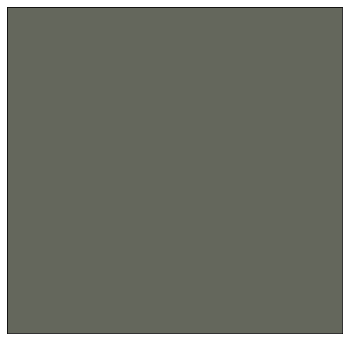

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans


class MyImage:
    def __init__(self, img_path):
        self.img_path = img_path
        self.img = cv2.imread(img_path)
    def get_shape(self, img):
        return img.shape
    def show(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    def rbg_to_hex(arr):
        return "#{:02x}{:02x}{:02x}".format(int(arr[0]), int(arr[1]), int(arr[2]))
    def get_resized_img(self, img, new_height, new_width):
        resized_img = cv2.resize(img, (new_height, new_width), interpolation = cv2.INTER_AREA)
        self.resized_img = resized_img
        return resized_img
    def get_reshaped_img(self, img):
        reshaped_img = img.reshape(img.shape[0]*img.shape[1], 3)
        self.reshaped_img = reshaped_img
        return reshaped_img


class ColorDetection:
    def get_kmeans_clf(self, reshaped_img, number_of_colors=3):
        """reshaped_img must be of 2 dim"""
        clf = KMeans(n_clusters = number_of_colors)
        self.labels = clf.fit_predict(reshaped_img)
        return clf
    def get_best_number_of_neighbors(self, max_neighbors, reshaped_img):
        inertia_list = []
        for i in range(1, max_neighbors+1):
            clf = KMeans(n_clusters=max_neighbors)
            clf.fit(reshaped_img)
            inertia_list.append(clf.inertia_)
        best_number_of_neighbors = inertia_list.index(min(inertia_list)) + 1
        return best_number_of_neighbors
    def get_best_kmeans_clf(self, reshaped_img, max_number_of_colors=10):
        """reshaped_img must be of 2 dim"""
        best_number_of_neighbors = self.get_best_number_of_neighbors(max_number_of_colors, reshaped_img)
        clf = KMeans(n_clusters=best_number_of_neighbors)
        self.labels = clf.fit_predict(reshaped_img)
        return clf
    def get_color_cluster_centers(self, clf):
        """clf = KMeans classifier"""
        cluster_centers = clf.cluster_centers_ # https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
        return cluster_centers
    def show_palette(self, rgb_arr_list):
        """rgb_arr_list = cluster_centers here"""
        scaled_colours = [[color / 255 for color in row] for row in rgb_arr_list]
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.axis(xmin=0, xmax=len(scaled_colours))
        ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for index, colour in enumerate(scaled_colours):
            ax.axvspan(index, index + 1, color=colour)
    def get_mean_center(self, cluster_centers):
        mean_center = sum(cluster_centers)/len(cluster_centers)
        self.mean_center = mean_center
        return mean_center


def image_to_rgb_mean(MyImage, ColorDetection, img_path, number_of_colors=3):
    mim = MyImage(img_path)
    print(mim.get_shape(mim.img))
    resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
    reshaped_img = mim.get_reshaped_img(resized_img)
    
    cd = ColorDetection()
    clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
    cluster_centers = cd.get_color_cluster_centers(clf)
    mean_center = sum(cluster_centers)/len(cluster_centers)
    return mean_center


def image_to_best_rgb_mean(MyImage, ColorDetection, img_path, max_neighbors=10):
    mim = MyImage(img_path)
    print(mim.get_shape(mim.img))
    resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
    reshaped_img = mim.get_reshaped_img(resized_img)
    
    cd = ColorDetection()
    clf = cd.get_best_kmeans_clf(reshaped_img, max_number_of_colors=max_neighbors)
    cluster_centers = cd.get_color_cluster_centers(clf)
    mean_center = sum(cluster_centers)/len(cluster_centers)
    return mean_center


def image_to_rgb_list(MyImage, ColorDetection, img_path, number_of_colors=3):
    mim = MyImage(img_path)
    print(mim.get_shape(mim.img))
    resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
    reshaped_img = mim.get_reshaped_img(resized_img)
    
    cd = ColorDetection()
    clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
    cluster_centers = cd.get_color_cluster_centers(clf)
    cd.show_palette(cluster_centers)
    # cd.show_palette([mean_center])
    return cluster_centers
    

def image_to_rgb(MyImage, ColorDetection, img_path, number_of_colors=3, ret='list', palette=0, max_number_of_colors=10):
    if ret == 'list':
        mim = MyImage(img_path)
        print(mim.get_shape(mim.img))
        resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
        reshaped_img = mim.get_reshaped_img(resized_img)
        
        cd = ColorDetection()
        clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
        cluster_centers = cd.get_color_cluster_centers(clf)
        if palette:
            cd.show_palette(cluster_centers)
        return cluster_centers
    if ret == 'mean':
        mim = MyImage(img_path)
        print(mim.get_shape(mim.img))
        resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
        reshaped_img = mim.get_reshaped_img(resized_img)
        
        cd = ColorDetection()
        clf = cd.get_kmeans_clf(reshaped_img, number_of_colors=number_of_colors)
        cluster_centers = cd.get_color_cluster_centers(clf)
        mean_center = sum(cluster_centers)/len(cluster_centers)
        if palette:
            cd.show_palette([mean_center])
        return mean_center
    if ret == 'best_mean':
        mim = MyImage(img_path)
        print(mim.get_shape(mim.img))
        resized_img = mim.get_resized_img(mim.img, new_height=100, new_width=100)
        reshaped_img = mim.get_reshaped_img(resized_img)
        
        cd = ColorDetection()
        clf = cd.get_best_kmeans_clf(reshaped_img, max_number_of_colors=max_number_of_colors)
        cluster_centers = cd.get_color_cluster_centers(clf)
        mean_center = sum(cluster_centers)/len(cluster_centers)
        if palette:
            cd.show_palette([mean_center])
        return mean_center
        

""" Testing """        
img_path = './img/lake/1.png'

# image_to_rgb(MyImage, ColorDetection, img_path, number_of_colors=5, ret='list', palette=1)
image_to_rgb(MyImage, ColorDetection, img_path, ret='best_mean', max_number_of_colors=10, palette=1)

In [1]:
""" Rename Image Files """
import os
import unidecode
def normalize_file_name(cwd):
    file_list = os.listdir(cwd)
    for i, file in enumerate(file_list):
        file_name = unidecode.unidecode(file)
        file_name = file_name.replace(' ', '_')
        file_name = file_name.replace('-', '')
        # print(file_name, file_list[i])
        os.rename(cwd + file_list[i], cwd + file_name)
normalize_file_name('./img/clipped/lake/')
normalize_file_name('./img/clipped/river/')

In [113]:
import glob
import unidecode
from pathlib import Path


""" Multiple Images To RGB list """
lake = '.\\img\\full\\lake\\*.png'
lakes = glob.glob(lake, recursive=False)
rgb_list = []
for l in lakes:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=str(Path(l)), number_of_colors=5, ret='mean', palette=0)
        rgb_list.append(rgb)
    except:
        print('error: ', l)

(756, 663, 3)
(749, 427, 3)
(671, 354, 3)
(803, 930, 3)
(607, 569, 3)
(680, 641, 3)
(758, 798, 3)
(447, 1174, 3)
(771, 936, 3)
(724, 698, 3)
(711, 1241, 3)
(733, 396, 3)
(841, 1727, 3)
(691, 1788, 3)
(640, 1875, 3)
(615, 1803, 3)
(747, 1336, 3)
(690, 843, 3)
(792, 1176, 3)
(812, 557, 3)
(836, 393, 3)
(448, 380, 3)
(535, 600, 3)
(670, 717, 3)
(678, 387, 3)
(535, 665, 3)
(688, 429, 3)
(839, 389, 3)
(791, 304, 3)
(676, 1197, 3)
(757, 1721, 3)
(410, 1534, 3)
(804, 1283, 3)
(762, 603, 3)
(768, 734, 3)
(759, 854, 3)
(745, 555, 3)
(779, 463, 3)
(749, 688, 3)
(541, 330, 3)
(601, 1001, 3)
(715, 1085, 3)
(636, 496, 3)
(755, 625, 3)
(708, 828, 3)
(702, 675, 3)
(710, 697, 3)
(727, 666, 3)
(809, 434, 3)
(432, 1475, 3)
(553, 439, 3)
(659, 949, 3)
(740, 489, 3)
(433, 931, 3)
(774, 565, 3)
(774, 856, 3)
(585, 708, 3)
(799, 930, 3)
(751, 401, 3)
(746, 700, 3)
(531, 720, 3)
(630, 570, 3)
(595, 851, 3)
(710, 865, 3)
(623, 1675, 3)
(867, 563, 3)
(826, 792, 3)
(715, 419, 3)
(799, 771, 3)
(859, 1048, 3)
(75

In [117]:
rgb_list[:5]

[array([88.82775776, 76.38446022, 87.75261444]),
 array([76.53938486, 86.19742123, 72.55243216]),
 array([84.86675765, 89.51311018, 83.99658842]),
 array([70.9658655 , 85.61428276, 78.78355494]),
 array([106.34404685, 109.71403422, 107.14186382])]

In [118]:
import pandas as pd

df = pd.DataFrame(rgb_list, columns=['r', 'g', 'b'])
df['label'] = 'lake'
df[['r', 'g', 'b']].astype(float)
df[['r', 'g', 'b']].round(2)
df[['label']].astype(str)
df.to_csv(r'./csv/full/lake.csv', index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.') 

In [122]:
""" Multiple Images To RGB list """
regex = './img/full/river/*.png'
files = glob.glob(regex, recursive=False)
river_rgb_list = []
for f in files:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=f, number_of_colors=5, ret='mean', palette=0)
        river_rgb_list.append(rgb)
    except:
        print('error: ', f)
print(river_rgb_list[:5])

def rgb_list_to_csv(label, rgb_list):
    df = pd.DataFrame(rgb_list, columns=['r', 'g', 'b'])
    df['label'] = label
    df[['r', 'g', 'b']].astype(float)
    df[['r', 'g', 'b']].round(2)
    df[['label']].astype(str)
    df.to_csv(f'./csv/full/{label}.csv', index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.') 
rgb_list_to_csv(label='river', rgb_list=river_rgb_list)

(433, 310, 3)
(309, 332, 3)
(398, 312, 3)
(355, 320, 3)
(461, 259, 3)
(279, 316, 3)
(296, 307, 3)
(472, 289, 3)
(310, 475, 3)
(427, 177, 3)
(417, 389, 3)
(198, 230, 3)
(357, 201, 3)
(329, 263, 3)
(339, 265, 3)
(400, 309, 3)
(340, 233, 3)
(360, 208, 3)
(440, 347, 3)
(354, 225, 3)
(196, 194, 3)
(358, 347, 3)
(322, 347, 3)
(402, 434, 3)
(447, 316, 3)
(324, 272, 3)
(273, 185, 3)
(269, 213, 3)
(201, 306, 3)
(295, 156, 3)
(287, 543, 3)
(252, 345, 3)
(148, 299, 3)
(175, 327, 3)
(418, 293, 3)
(312, 352, 3)
(240, 287, 3)
(342, 226, 3)
(418, 338, 3)
(530, 368, 3)
(429, 323, 3)
(452, 466, 3)
(346, 329, 3)
(265, 360, 3)
(216, 264, 3)
(148, 281, 3)
(452, 302, 3)
(530, 344, 3)
(306, 307, 3)
(200, 418, 3)
(211, 421, 3)
(406, 626, 3)
(411, 491, 3)
(354, 418, 3)
(310, 309, 3)
(173, 453, 3)
(449, 299, 3)
(484, 613, 3)
(478, 254, 3)
(355, 553, 3)
(307, 567, 3)
(461, 279, 3)
(330, 594, 3)
(243, 729, 3)
(505, 687, 3)
(379, 793, 3)
(513, 406, 3)
(475, 442, 3)
(324, 640, 3)
(339, 336, 3)
(306, 472, 3)
(331, 

In [ ]:
regex = './img/full/sea/*.png'
files = glob.glob(regex, recursive=False)
sea_rgb_list = []
for f in files:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=f, number_of_colors=5, ret='mean', palette=0)
        sea_rgb_list.append(rgb)
    except:
        print('error: ', f)
print(sea_rgb_list[:5])
rgb_list_to_csv(label='sea', rgb_list=sea_rgb_list)

In [135]:
df1 = pd.read_csv(r"./csv/full/lake.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df2 = pd.read_csv(r"./csv/full/river.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df3 = pd.read_csv(r"./csv/full/sea.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df_all = pd.concat([df1, df2, df3], axis=0)
labels = {
    "lake": 0, "river": 1, "sea": 2
}
df_all['label_int'] = df_all['label'].map(labels)
df_all[['label_int']].astype(int)
df_all.to_csv(r'./csv/full/all.csv', columns=None, index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.') 

In [ ]:
def rgb_list_to_csv2(label, rgb_list):
    df = pd.DataFrame(rgb_list, columns=['r', 'g', 'b'])
    df['label'] = label
    df[['r', 'g', 'b']].astype(float)
    df[['r', 'g', 'b']].round(2)
    df[['label']].astype(str)
    df.to_csv(f'./csv/clipped/{label}.csv', index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.') 
    
    
regex = './img/clipped/lake/*.png'
files = glob.glob(regex, recursive=False)
rgb_list = []
for f in files:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=f, ret='best_mean', max_number_of_colors=10, palette=0)
        rgb_list.append(rgb)
    except:
        print('error: ', f)

rgb_list_to_csv2(label='lake', rgb_list=rgb_list)

In [ ]:
regex = './img/clipped/river/*.png'
files = glob.glob(regex, recursive=False)
rgb_list = []
for f in files:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=f, ret='best_mean', max_number_of_colors=10, palette=0)
        rgb_list.append(rgb)
    except:
        print('error: ', f)

rgb_list_to_csv2(label='river', rgb_list=rgb_list)

In [ ]:
regex = './img/full/sea/*.png'
files = glob.glob(regex, recursive=False)
rgb_list = []
for f in files:
    try:
        rgb = image_to_rgb(MyImage, ColorDetection, img_path=f, ret='best_mean', max_number_of_colors=10, palette=0)
        rgb_list.append(rgb)
    except:
        print('error: ', f)

rgb_list_to_csv2(label='sea', rgb_list=rgb_list)

In [22]:
df1 = pd.read_csv(r"./csv/clipped/lake.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df2 = pd.read_csv(r"./csv/clipped/river.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df3 = pd.read_csv(r"./csv/clipped/sea.csv", encoding="utf-8-sig", delimiter=',', thousands=r',', dtype=None, chunksize=None)
df_all = pd.concat([df1, df2, df3], axis=0)
labels = {
    "lake": 0, "river": 1, "sea": 2
}
df_all['label_int'] = df_all['label'].map(labels)
df_all[['label_int']].astype(int)
df_all.to_csv(r'./csv/clipped/all.csv', columns=None, index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.') 

In [23]:
print(len(df1.index))
print(len(df2.index))
print(len(df3.index))

75
124
76


In [24]:
import dill
dill.dump_session('sessions/rgb_list_to_df.pkl')

In [2]:
import dill
dill.load_session('sessions/rgb_list_to_df.pkl')